# Capstone Project - Car Accident Severity
### Applied Data Science Capstone by IBM/Coursera

## Introduction/Business Problem

In this project we will predict accident severity based on different features and we will try to detect locations where the accident frequently happen. This report will be targeted to Police officer to make them more wary for these particular places.

## Data

In this project we will use sample dataset "Data-Collision" to solve the problem.
We assume Location where collision happen will be the most important feature to predict accident severity. Followed by Road Condition, Light Condition, Weather,etc. Based on our assumption We will focusing on location (Junction type, Collision Type)

## Working with Data

### Importing All Dependencies
Import all relevant libraries on cell below

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

### Load the Data

In [2]:
df = pd.read_csv(r"C:\Users\farre\Downloads\Data-Collisions.csv")
df.head()

C:\Users\farre\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Data Description
Description of data we would like to use

**Severity (Target Feature)** : 1=Property Damage Only Collision, 2=Injury Collision

**X,Y,Location** : Location accident happen

**JUNCTIONTYPE, ADDRTYPE** : Category which collision took place

**WEATHER**:A description of the weather conditions during the time of the collision

**ROADCOND**: The condition of the road during the collision.

**LIGHTCOND**: The light conditions during the collision.

More Attribute Description could be found [here]( https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf)

### Check for Missing Value
Before doing EDA, I would like to clean missing value and delete some feature we didn't use

In [3]:
df_dummy=df
df_dummy.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


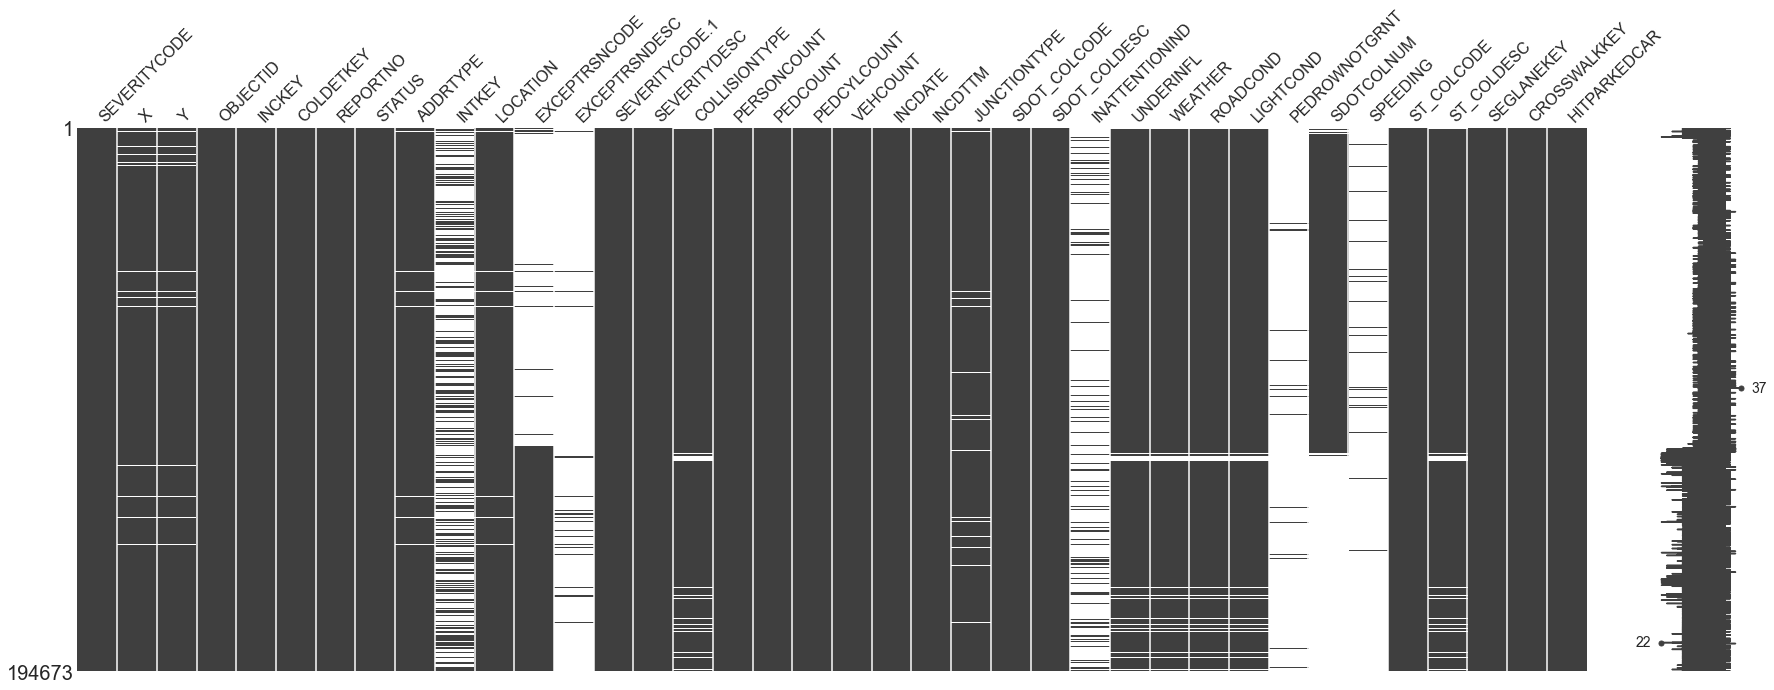

In [4]:
missingno.matrix(df_dummy, figsize = (30,10))

### What we don't use and why we dont use it
**INCKEY, COLDETKEY, STATUS** : I dont know the importance of matching unique key and secondary key, would be appreciated if someone could tell me as I can't find it on internet.

**OBJECT ID, REPORTNO, INTKEY, EXCEPTRSNCODE, EXCEPTRSNDESC, SDOTCOLNUM** : Not relevant to predict Severity

**SEVERITYCODE.1** : Duplicate of SEVERITYCODE

**SEVERITYDESC, SDOT_COLDESC,ST_COLDESC** : Description

**INCDATE,INCDTTM** : For simplicity

**SEGLANEKEY, CROSSWALKKEY** : Too many unique Value

**PEDCOUNT, PEDCYLCOUNT** : more than 95% of data equal 0

In [5]:
df_dummy=df_dummy.drop(['INCKEY','COLDETKEY','STATUS','OBJECTID','REPORTNO','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SDOTCOLNUM','SEVERITYCODE.1','SEVERITYDESC','SDOT_COLDESC','ST_COLDESC','INCDATE','INCDTTM','SEGLANEKEY','CROSSWALKKEY','PEDCOUNT','PEDCYLCOUNT'],axis=1)

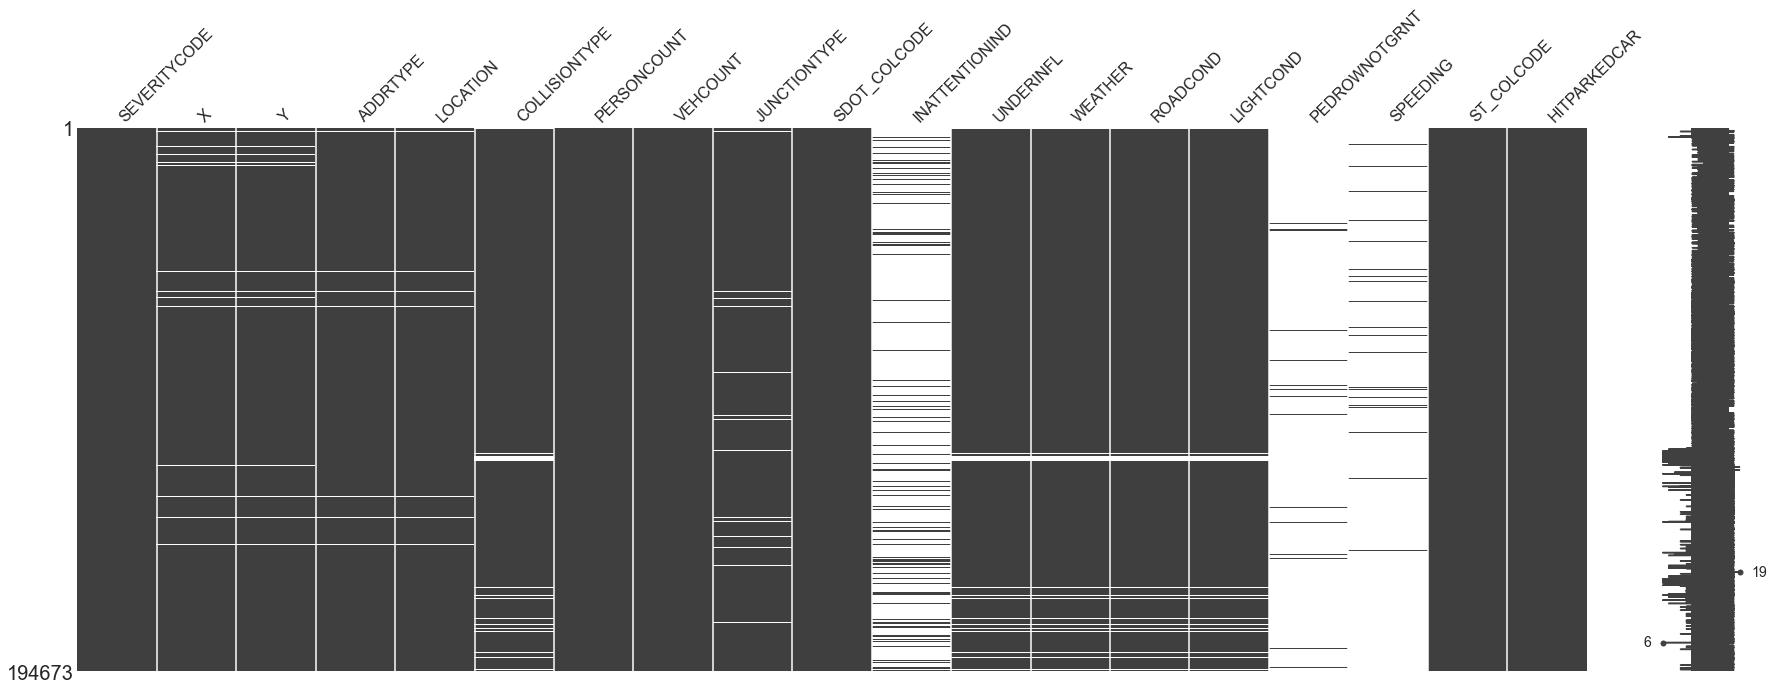

In [6]:
missingno.matrix(df_dummy, figsize = (30,10))

In [7]:
df_dummy.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
ADDRTYPE            1926
LOCATION            2677
COLLISIONTYPE       4904
PERSONCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
ST_COLCODE            18
HITPARKEDCAR           0
dtype: int64

### Dropping NaN Value

we will drop NaN in COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,X,Y and Location for simplicity

In [8]:
print(len(df_dummy))
df_dummy = df_dummy.dropna(subset=['X','COLLISIONTYPE','JUNCTIONTYPE','ROADCOND','LIGHTCOND','WEATHER'])
print(len(df_dummy))

194673
180067


In [9]:
df_dummy.isnull().sum()

SEVERITYCODE           0
X                      0
Y                      0
ADDRTYPE               0
LOCATION               0
COLLISIONTYPE          0
PERSONCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE           0
SDOT_COLCODE           0
INATTENTIONIND    151276
UNDERINFL              0
WEATHER                0
ROADCOND               0
LIGHTCOND              0
PEDROWNOTGRNT     175436
SPEEDING          171417
ST_COLCODE             0
HITPARKEDCAR           0
dtype: int64

### Filling NaN Values

In [10]:
# What kind of values are in INATTENTIONIND?
df_dummy.INATTENTIONIND.value_counts()

Y    28791
Name: INATTENTIONIND, dtype: int64

In [11]:
# What kind of values are in PEDROWNOTGRNT?
df_dummy.PEDROWNOTGRNT.value_counts()

Y    4631
Name: PEDROWNOTGRNT, dtype: int64

In [12]:
# What kind of values are in SPEEDING?
df_dummy.SPEEDING.value_counts()

Y    8650
Name: SPEEDING, dtype: int64

There is only "Yes" value in INATTENTIONIND,PEDROWNOTGRNT,SPEEDING. So we assume NaN value as "No". 

Then we change every NaN value as "No"

<!--
GreeDoT Was Here
-->

In [13]:
df_dummy['INATTENTIONIND'] = df_dummy['INATTENTIONIND'].fillna("N")
df_dummy['PEDROWNOTGRNT'] = df_dummy['PEDROWNOTGRNT'].fillna("N")
df_dummy['SPEEDING'] = df_dummy['SPEEDING'].fillna("N")

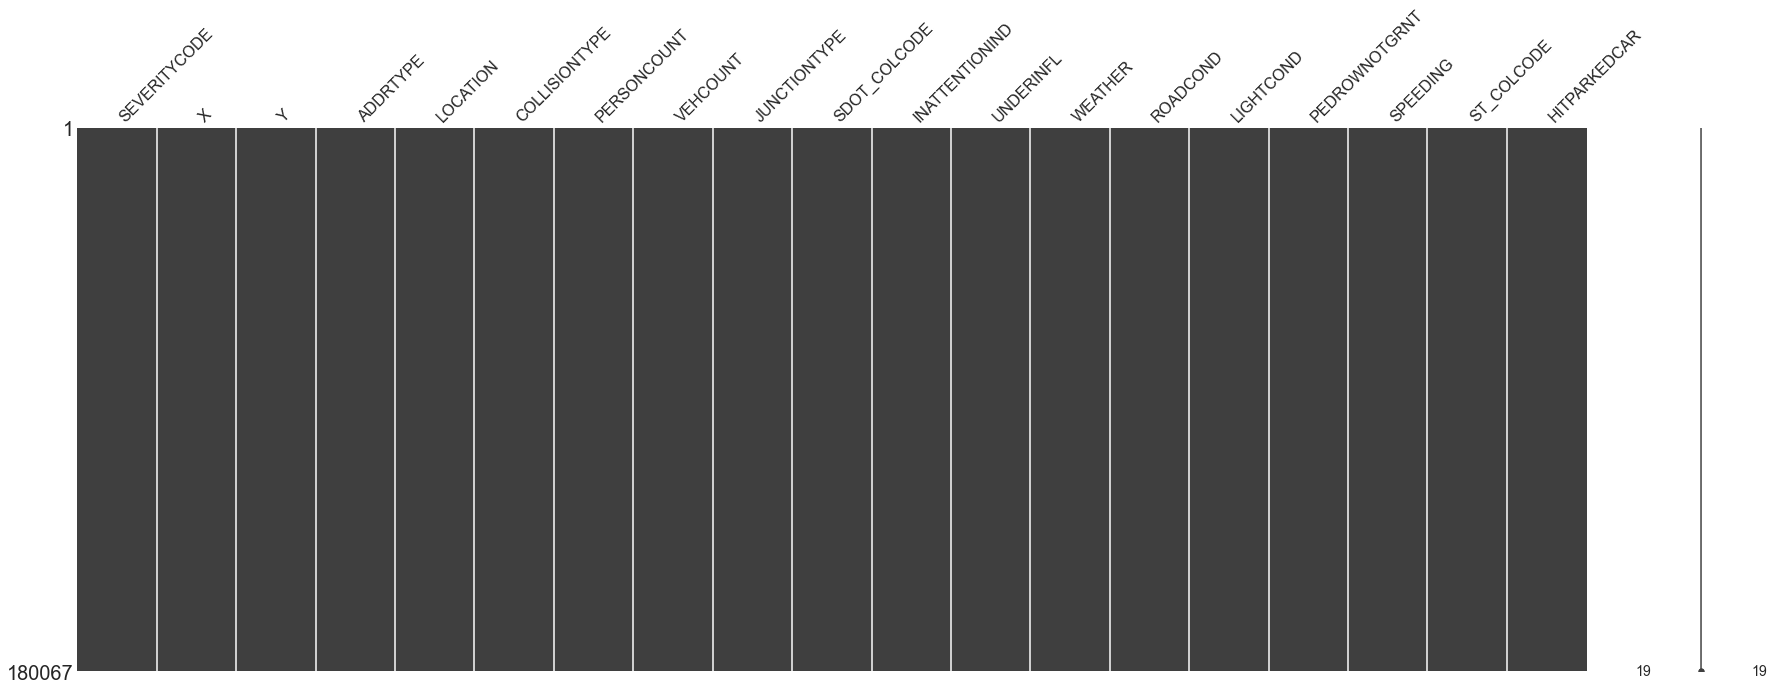

In [14]:
missingno.matrix(df_dummy, figsize = (30,10))

In [15]:
df_dummy.isnull().sum()

SEVERITYCODE      0
X                 0
Y                 0
ADDRTYPE          0
LOCATION          0
COLLISIONTYPE     0
PERSONCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
SDOT_COLCODE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
HITPARKEDCAR      0
dtype: int64

Before going to EDA we will move column X,Y and Location to another df as we dont use it for ML model

In [16]:
df_Location = pd.DataFrame()

In [17]:
df_Location['X'] = df_dummy['X']
df_Location['Y'] = df_dummy['Y']
df_Location['Location'] = df_dummy['LOCATION']
df_Location.head()

,X,Y,Location
0,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST
1,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N
2,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST
3,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST
4,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP


In [18]:
df_dummy = df_dummy.drop(['X','Y','LOCATION'],axis = 1)
df_dummy.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,2,At Intersection (intersection related),11,N,N,Overcast,Wet,Daylight,N,N,10,N
1,1,Block,Sideswipe,2,2,Mid-Block (not related to intersection),16,N,0,Raining,Wet,Dark - Street Lights On,N,N,11,N
2,1,Block,Parked Car,4,3,Mid-Block (not related to intersection),14,N,0,Overcast,Dry,Daylight,N,N,32,N
3,1,Block,Other,3,3,Mid-Block (not related to intersection),11,N,N,Clear,Dry,Daylight,N,N,23,N
4,2,Intersection,Angles,2,2,At Intersection (intersection related),11,N,0,Raining,Wet,Daylight,N,N,10,N


## Exploratory Data Analysis
We will explore each of these features individually

In [19]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Property Damage Only Collision"});
        sns.distplot(data.loc[data[label_column] == 2][target_column], 
                     kde_kws={"label": "Injury Collision"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Property Damage Only Collision"});
        sns.distplot(data.loc[data[label_column] == 2][target_column], 
                     kde_kws={"label": "Injury Collision"});

### 1. Target Feature : Severity
This is the variable we want our Machine Learning Model to predict

Note : 1=Property Damage Only Collision, 2=Injury Collision

1    124258
2     55809
Name: SEVERITYCODE, dtype: int64


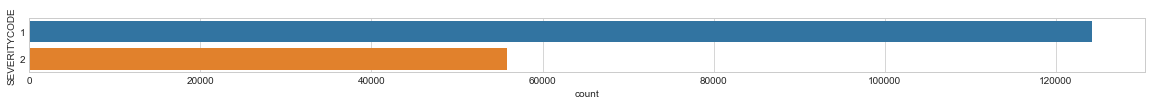

In [20]:
# How many collision happen?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='SEVERITYCODE', data=df_dummy);
print(df_dummy.SEVERITYCODE.value_counts())

### 2. Feature : ADDRTYPE

In [21]:
df_dummy.ADDRTYPE.value_counts()

Block           117085
Intersection     62982
Name: ADDRTYPE, dtype: int64

In [22]:
df_dummy['ADDRTYPE'] = np.where(df_dummy['ADDRTYPE'] == 'Block', 1, 0) # change ADDRTYPE to 0 for Intersection and 1 for Block

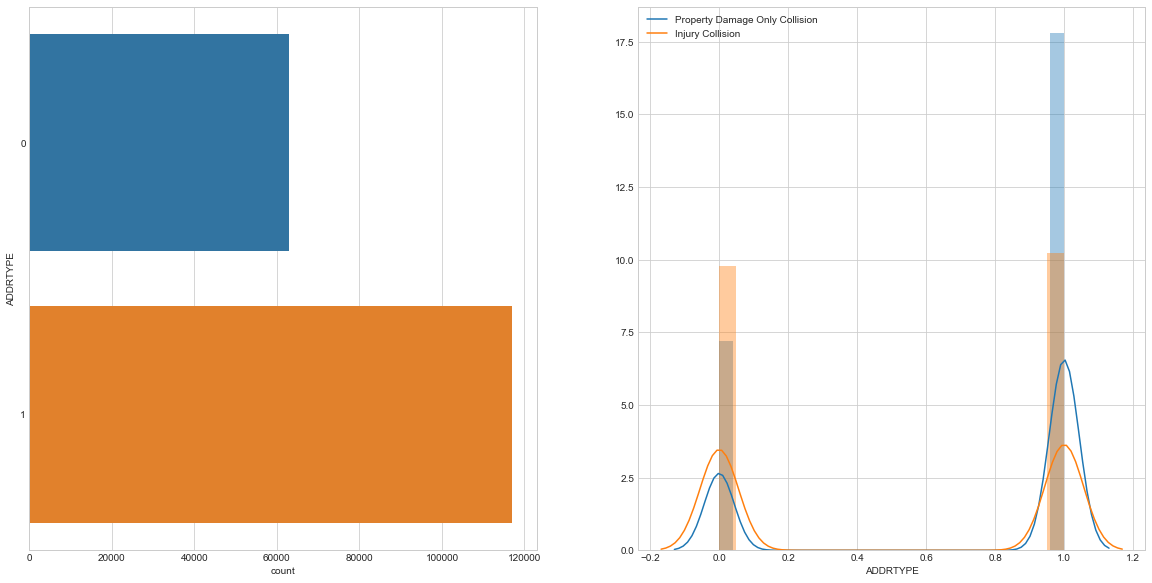

In [23]:
plot_count_dist(df_dummy, 
                bin_df=df_dummy, 
                label_column='SEVERITYCODE', 
                target_column='ADDRTYPE', 
                figsize=(20, 10))

From the graph property damage collision more likely happen in Block, whilst Injury collision more likely happen in Intersection

### 3. Feature : Collision Type

Parked Car    42886
Angles        34353
Rear Ended    32778
Other         21907
Sideswipe     17862
Left Turn     13586
Pedestrian     6481
Cycles         5334
Right Turn     2901
Head On        1979
Name: COLLISIONTYPE, dtype: int64


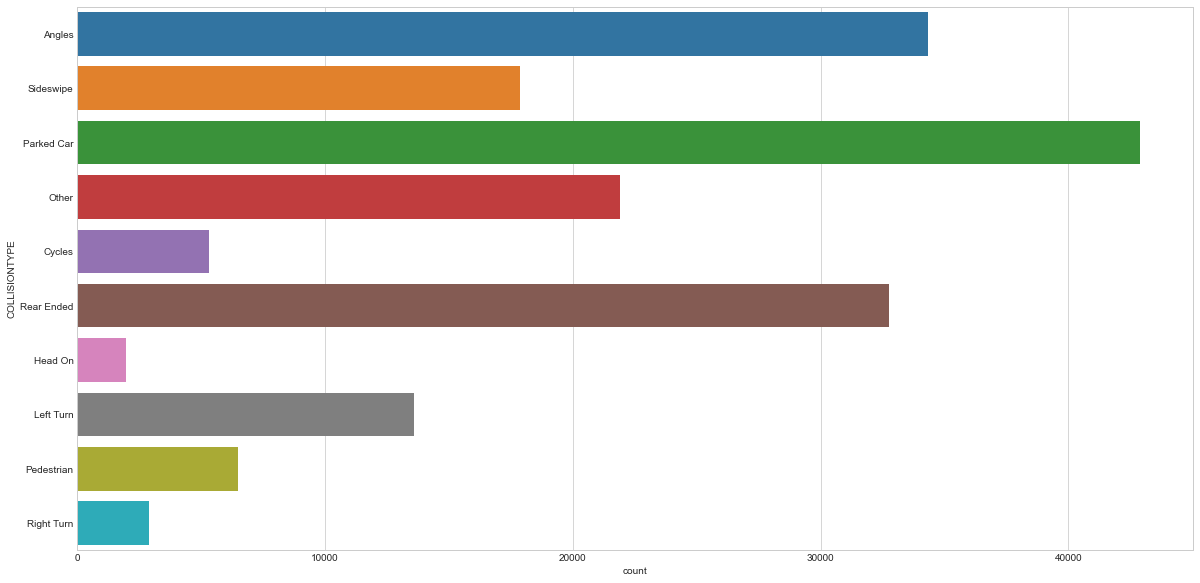

In [24]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='COLLISIONTYPE', data=df_dummy);
print(df_dummy.COLLISIONTYPE.value_counts())

### 4. Feature : Person Count

2     104408
3      34356
4      14155
1      10561
5       6450
0       5310
6       2647
7       1096
8        521
9        207
10       127
11        54
12        32
13        21
14        17
15        11
17        11
16         7
18         6
44         6
19         5
20         5
25         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64


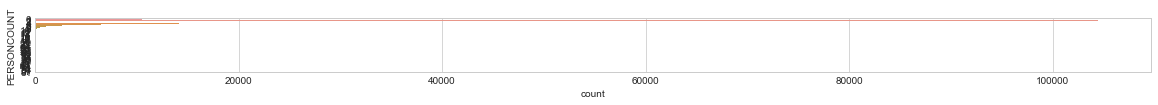

In [25]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='PERSONCOUNT', data=df_dummy);
print(df_dummy.PERSONCOUNT.value_counts())

### 5. Feature : Vehicle Count

In [26]:
df_dummy.VEHCOUNT.value_counts()

2     140010
1      24126
3      12635
4       2367
5        518
0        195
6        143
7         41
8         15
9          9
11         5
10         2
12         1
Name: VEHCOUNT, dtype: int64

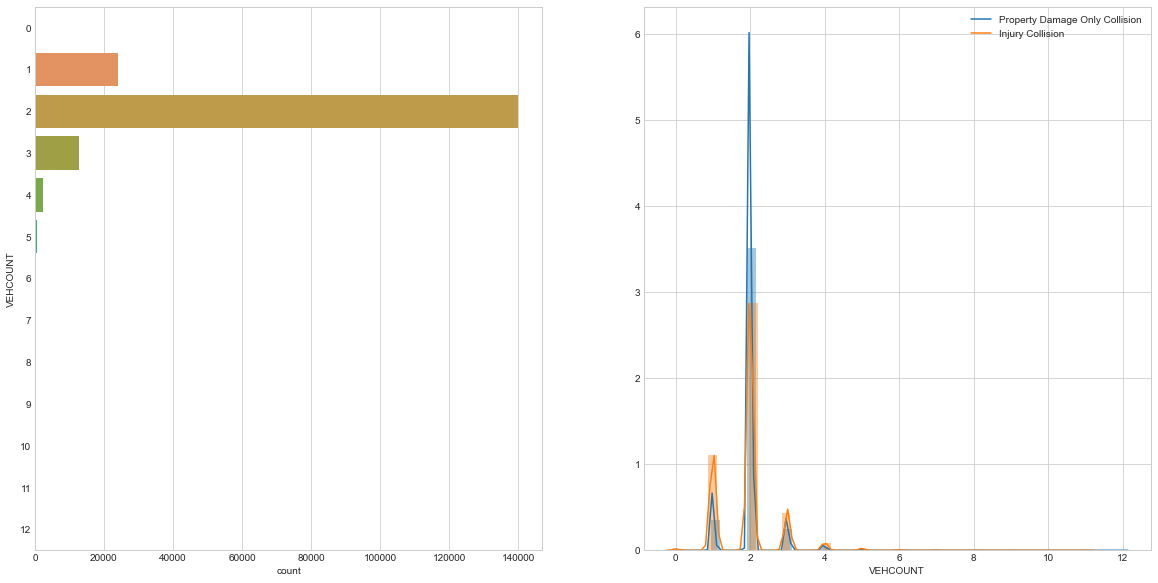

In [27]:
plot_count_dist(df_dummy, 
                bin_df=df_dummy, 
                label_column='SEVERITYCODE', 
                target_column='VEHCOUNT', 
                figsize=(20, 10))

### 6. Feature : Junction Type

In [28]:
df_dummy.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              84513
At Intersection (intersection related)               60915
Mid-Block (but intersection related)                 22035
Driveway Junction                                    10430
At Intersection (but not related to intersection)     2030
Ramp Junction                                          139
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

Mid-Block (not related to intersection)              84513
At Intersection (intersection related)               60915
Mid-Block (but intersection related)                 22035
Driveway Junction                                    10430
At Intersection (but not related to intersection)     2030
Ramp Junction                                          139
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64


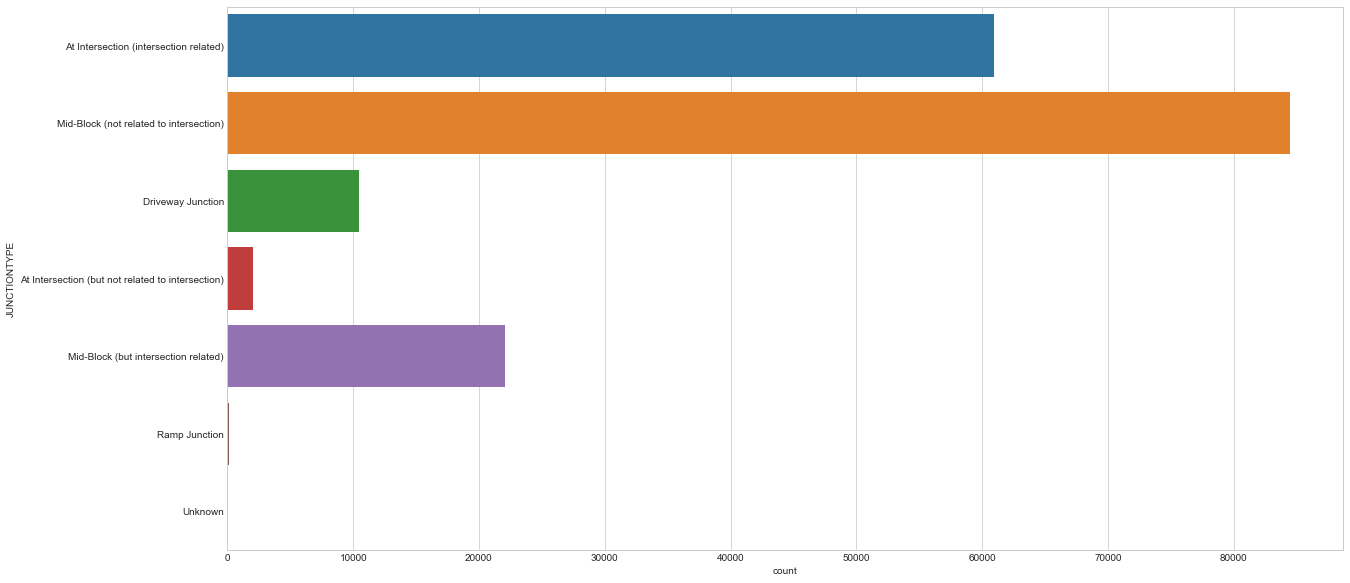

In [29]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='JUNCTIONTYPE', data=df_dummy);
print(df_dummy.JUNCTIONTYPE.value_counts())

### 7. Feature : SDOT_COLCODE

In [30]:
df_dummy.SDOT_COLCODE.value_counts()

11    82415
14    51486
16     9635
28     8482
24     6340
13     5589
26     3957
18     3009
0      2986
15     1560
12     1365
51     1281
29      457
21      180
56      175
27      159
54      132
23      120
48      105
25      101
31      101
34       90
64       74
69       67
33       53
55       50
66       23
22       15
32       12
53        9
44        8
61        7
35        6
68        4
36        4
58        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64

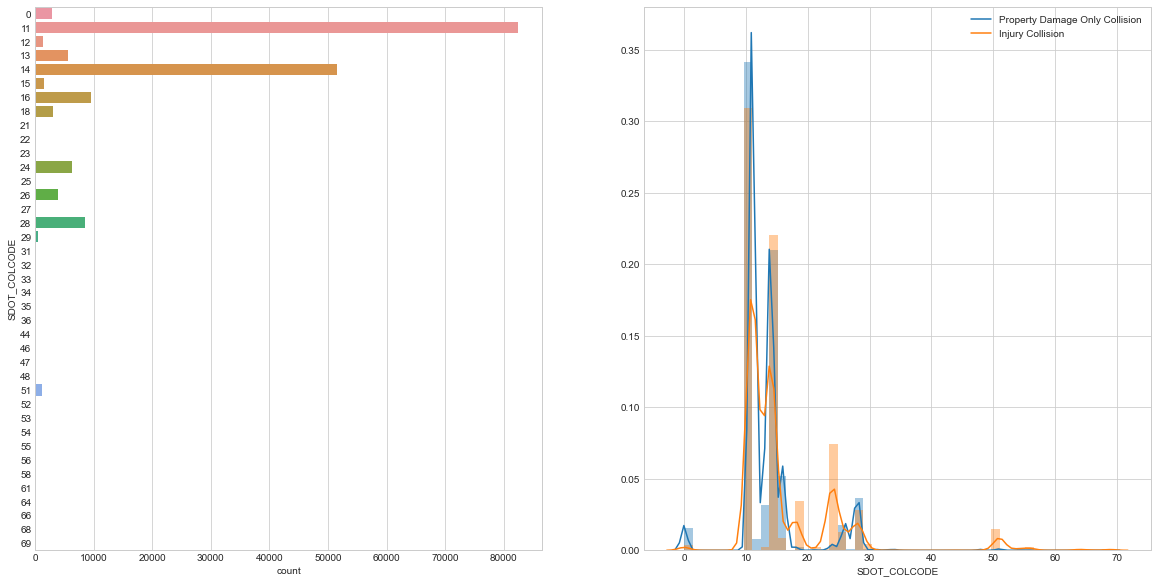

In [31]:
plot_count_dist(df_dummy, 
                bin_df=df_dummy, 
                label_column='SEVERITYCODE', 
                target_column='SDOT_COLCODE', 
                figsize=(20, 10))

### 8. Feature : INATTENTIONIND

In [32]:
df_dummy.INATTENTIONIND.value_counts()

N    151276
Y     28791
Name: INATTENTIONIND, dtype: int64

In [33]:
df_dummy['INATTENTIONIND']=np.where(df_dummy['INATTENTIONIND'] == 'N', 0, 1)

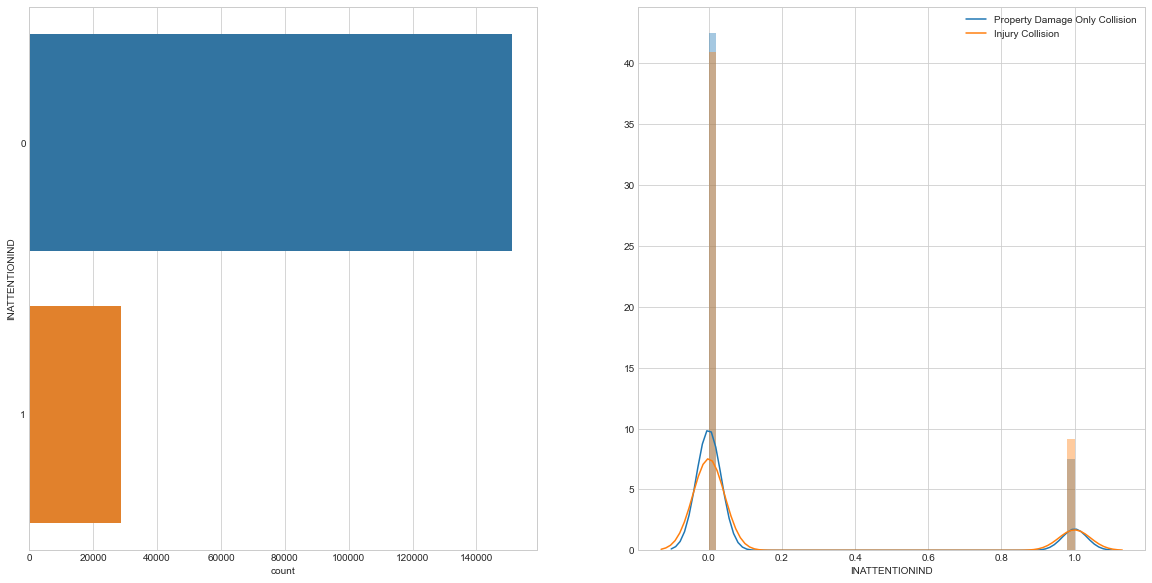

In [34]:
plot_count_dist(df_dummy, 
                bin_df=df_dummy, 
                label_column='SEVERITYCODE', 
                target_column='INATTENTIONIND', 
                figsize=(20, 10))

### 9. Feature : UNDERINFL

In [35]:
df_dummy.UNDERINFL.value_counts()

N    93736
0    77514
Y     4939
1     3878
Name: UNDERINFL, dtype: int64

In [36]:
df_dummy['UNDERINFL']=np.where(df_dummy['UNDERINFL'] == 'N', 0, df_dummy['UNDERINFL'])
df_dummy['UNDERINFL']=np.where(df_dummy['UNDERINFL'] == 'Y', 1, df_dummy['UNDERINFL'])

In [37]:
df_dummy['UNDERINFL'] = df_dummy['UNDERINFL'].astype(int)

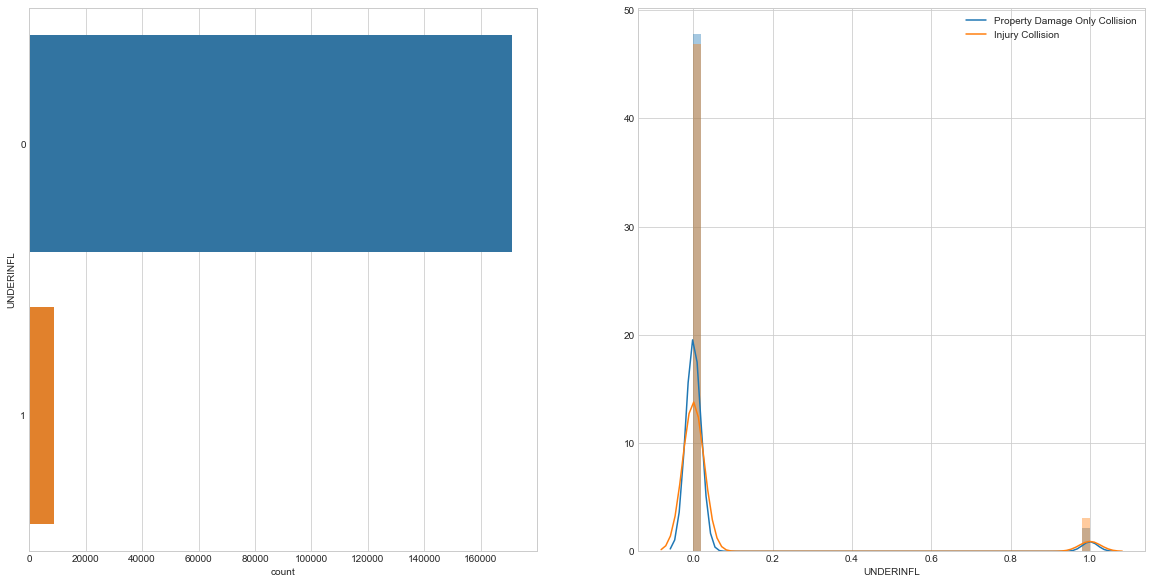

In [38]:
plot_count_dist(df_dummy, 
                bin_df=df_dummy, 
                label_column='SEVERITYCODE', 
                target_column='UNDERINFL', 
                figsize=(20, 10))

### 10. Feature : Weather

In [39]:
df_dummy.WEATHER.value_counts()

Clear                       107692
Raining                      31719
Overcast                     26809
Unknown                      11505
Snowing                        875
Other                          728
Fog/Smog/Smoke                 549
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Clear                       107692
Raining                      31719
Overcast                     26809
Unknown                      11505
Snowing                        875
Other                          728
Fog/Smog/Smoke                 549
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64


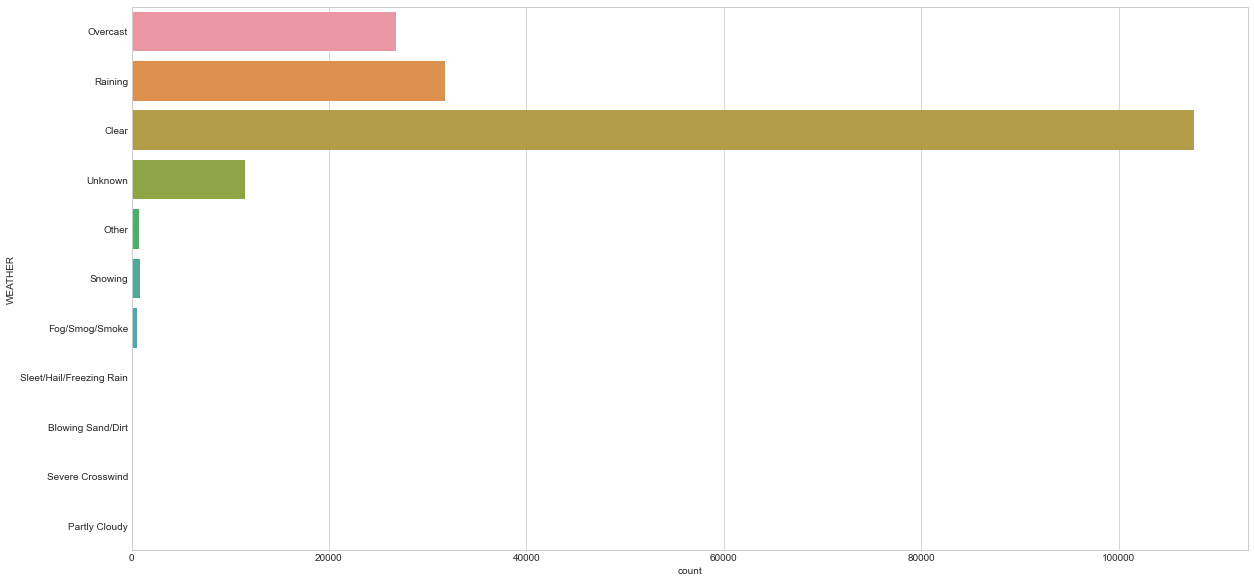

In [40]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='WEATHER', data=df_dummy);
print(df_dummy.WEATHER.value_counts())

### 11. Feature : ROADCOND	

In [41]:
df_dummy.ROADCOND.value_counts()

Dry               120629
Wet                45597
Unknown            11384
Ice                 1161
Snow/Slush           971
Other                115
Standing Water        99
Sand/Mud/Dirt         62
Oil                   49
Name: ROADCOND, dtype: int64

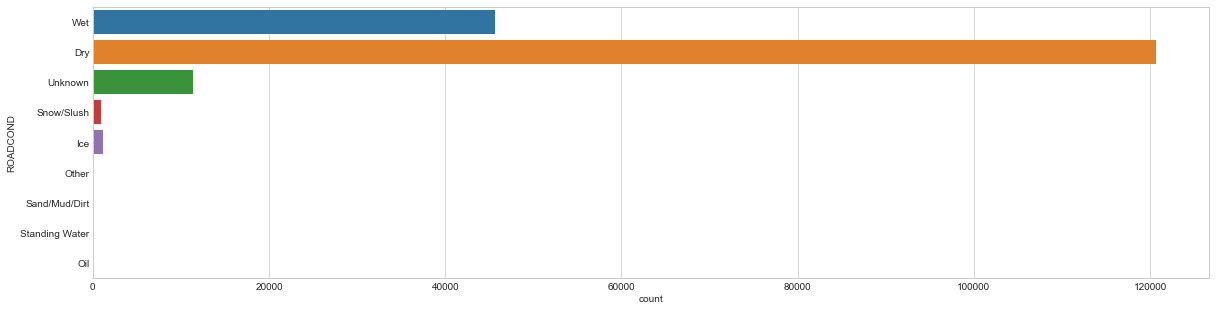

In [42]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y='ROADCOND', data=df_dummy)

### 12. Feature : LIGHTCOND

In [43]:
df_dummy.LIGHTCOND.value_counts()

Daylight                    112216
Dark - Street Lights On      46683
Unknown                      10340
Dusk                          5708
Dawn                          2389
Dark - No Street Lights       1418
Dark - Street Lights Off      1130
Other                          172
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

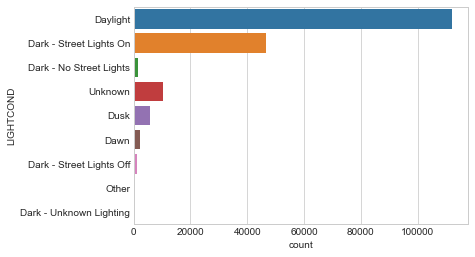

In [44]:
sns.countplot(y='LIGHTCOND', data=df_dummy)

### 13. Feature : Speeding

In [45]:
df_dummy['SPEEDING'] = np.where(df_dummy['SPEEDING'] == 'N', 0, 1) # change SPEEDING to 0 for N and 1 for Y

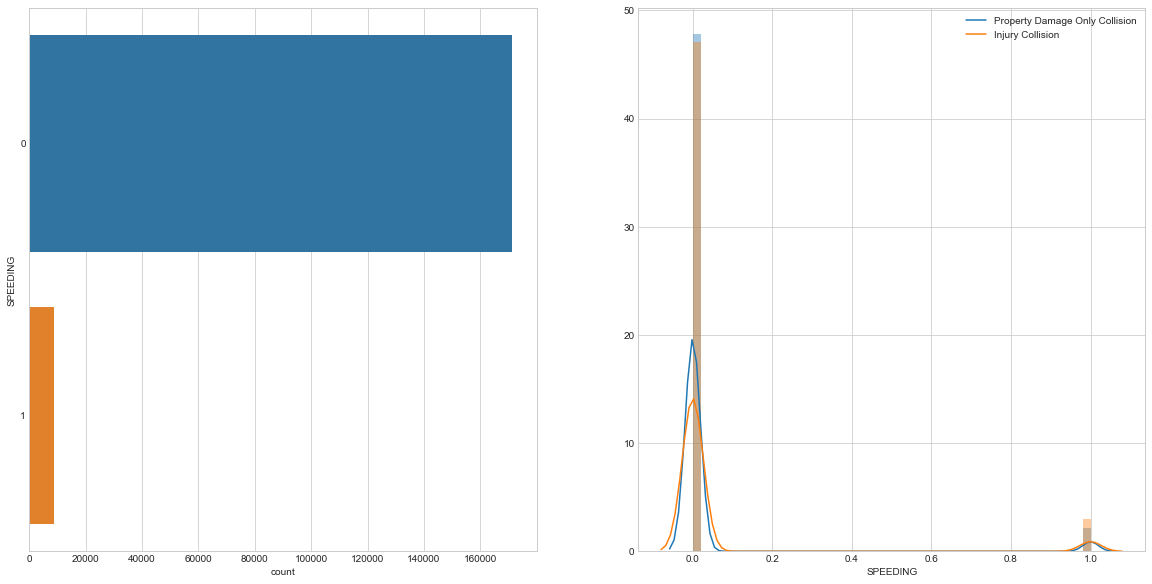

In [46]:
plot_count_dist(df_dummy, 
                bin_df=df_dummy, 
                label_column='SEVERITYCODE', 
                target_column='SPEEDING', 
                figsize=(20, 10))

### 14. Feature : PEDROWNOTGRNT Type

In [47]:
df_dummy.PEDROWNOTGRNT.value_counts()

N    175436
Y      4631
Name: PEDROWNOTGRNT, dtype: int64

In [48]:
df_dummy['PEDROWNOTGRNT']=np.where(df_dummy['PEDROWNOTGRNT'] == 'N', 0, 1)

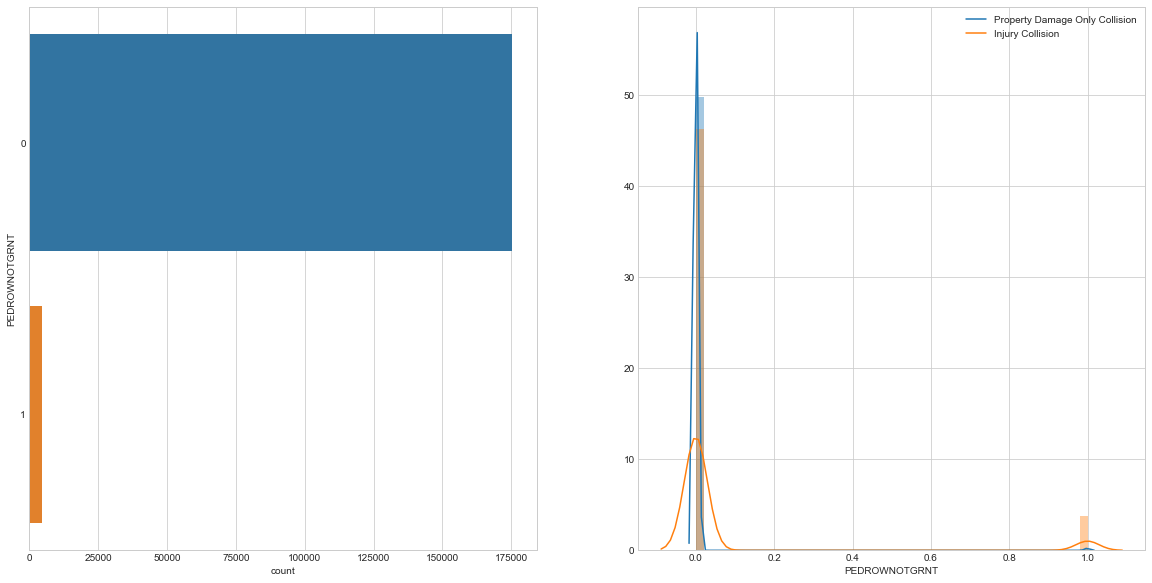

In [49]:
plot_count_dist(df_dummy, 
                bin_df=df_dummy, 
                label_column='SEVERITYCODE', 
                target_column='PEDROWNOTGRNT', 
                figsize=(20, 10))

### 15. Feature : ST_COLCODE

In [83]:
df_dummy.ST_COLCODE.value_counts()

32    39408
10    34353
14    24925
11    12178
50    12157
      ...  
43        2
87        2
60        1
49        1
85        1
Name: ST_COLCODE, Length: 62, dtype: int64

There is a double "32", there may be another double so we change data type to int

In [81]:
df_dummy['ST_COLCODE'] = df_dummy['ST_COLCODE'].astype(int)

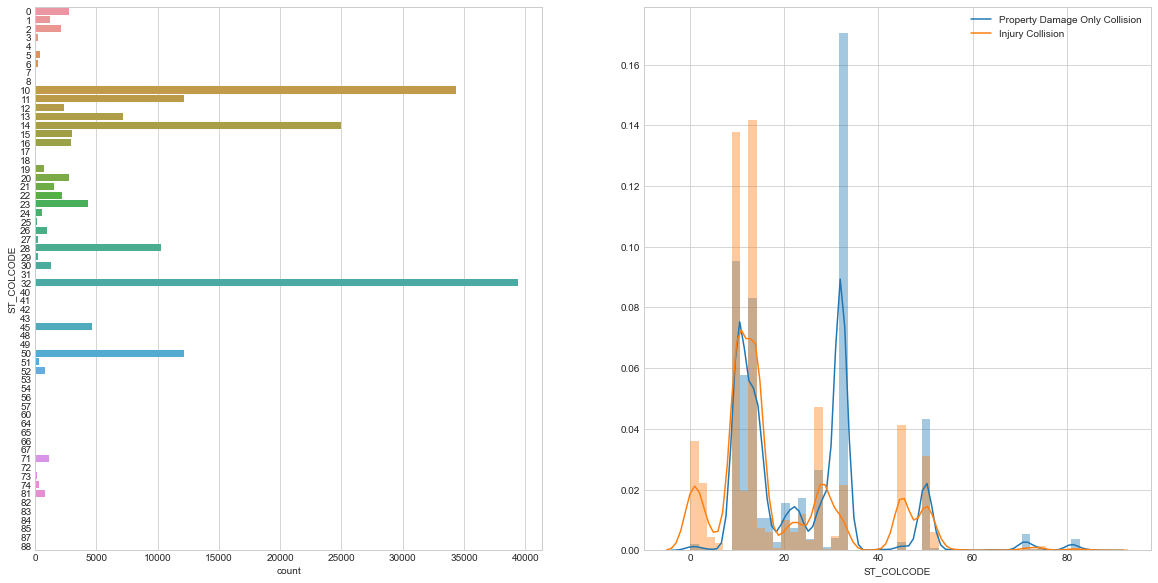

In [82]:
plot_count_dist(df_dummy, 
                bin_df=df_dummy, 
                label_column='SEVERITYCODE', 
                target_column='ST_COLCODE', 
                figsize=(20, 10))

### 16. Feature : HitParkedCar

In [52]:
df_dummy.HITPARKEDCAR.value_counts()

N    174386
Y      5681
Name: HITPARKEDCAR, dtype: int64

In [53]:
df_dummy['HITPARKEDCAR']=np.where(df_dummy['HITPARKEDCAR'] == 'N', 0, 1)

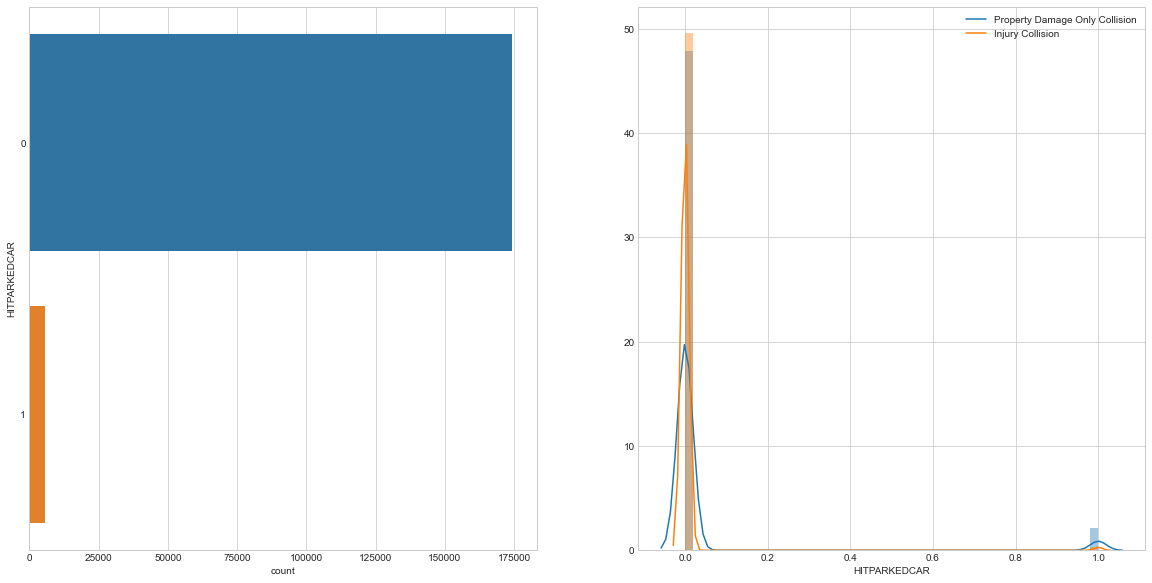

In [54]:
plot_count_dist(df_dummy, 
                bin_df=df_dummy, 
                label_column='SEVERITYCODE', 
                target_column='HITPARKEDCAR', 
                figsize=(20, 10))

## Creating Train set and Test set

we will split the data into train set and test set with ratio 8:2

For Simplicity I only take 5000 row as test set and train set

In [84]:
df_dummy2 = df_dummy[:50000]
df_dummy2.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,0,Angles,2,2,At Intersection (intersection related),11,0,0,Overcast,Wet,Daylight,0,0,10,0
1,1,1,Sideswipe,2,2,Mid-Block (not related to intersection),16,0,0,Raining,Wet,Dark - Street Lights On,0,0,11,0
2,1,1,Parked Car,4,3,Mid-Block (not related to intersection),14,0,0,Overcast,Dry,Daylight,0,0,32,0
3,1,1,Other,3,3,Mid-Block (not related to intersection),11,0,0,Clear,Dry,Daylight,0,0,23,0
4,2,0,Angles,2,2,At Intersection (intersection related),11,0,0,Raining,Wet,Daylight,0,0,10,0


In [85]:
df_dummy2.shape

(50000, 16)

In [86]:
df_dummy2.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'ST_COLCODE', 'HITPARKEDCAR'],
      dtype='object')

In [87]:
X = df_dummy2.drop(['SEVERITYCODE'],axis=1)

In [88]:
X.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,0,Angles,2,2,At Intersection (intersection related),11,0,0,Overcast,Wet,Daylight,0,0,10,0
1,1,Sideswipe,2,2,Mid-Block (not related to intersection),16,0,0,Raining,Wet,Dark - Street Lights On,0,0,11,0
2,1,Parked Car,4,3,Mid-Block (not related to intersection),14,0,0,Overcast,Dry,Daylight,0,0,32,0
3,1,Other,3,3,Mid-Block (not related to intersection),11,0,0,Clear,Dry,Daylight,0,0,23,0
4,0,Angles,2,2,At Intersection (intersection related),11,0,0,Raining,Wet,Daylight,0,0,10,0


In [89]:
Y = df_dummy2.SEVERITYCODE
Y.head()

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [90]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (40000, 15) (40000,)
Test set: (10000, 15) (10000,)


## Feature Encoding
Now we have our Train set ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our Train dataframe (`X_train`) with one-hot encoding

In [91]:
X_train.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
40263,1,Parked Car,2,2,Mid-Block (not related to intersection),11,0,1,Clear,Dry,Dark - No Street Lights,0,0,32,0
31848,0,Angles,3,2,At Intersection (intersection related),14,0,0,Clear,Dry,Daylight,0,0,10,0
46607,0,Left Turn,2,2,At Intersection (intersection related),11,0,0,Clear,Dry,Daylight,0,0,28,0
16998,0,Sideswipe,3,2,At Intersection (intersection related),16,0,1,Overcast,Dry,Daylight,0,0,11,0
14198,0,Angles,2,2,At Intersection (intersection related),11,0,0,Raining,Wet,Daylight,0,0,10,0


In [92]:
# One-hot encode 
one_hot_cols = X_train.columns.tolist()
X_train_enc = pd.get_dummies(X_train, columns=one_hot_cols)

X_train_enc.head()

,ADDRTYPE_0,ADDRTYPE_1,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,...,ST_COLCODE_71,ST_COLCODE_72,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,HITPARKEDCAR_0,HITPARKEDCAR_1
40263,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
31848,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46607,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14198,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [93]:
X_train_enc.shape

(40000, 193)

## Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

In [94]:
print("X train shape :",X_train_enc.shape)
print("Y train shape :",y_train.shape)

X train shape : (40000, 193)
Y train shape : (40000,)


In [95]:
list(X_train_enc.columns.values)

['ADDRTYPE_0',
 'ADDRTYPE_1',
 'COLLISIONTYPE_Angles',
 'COLLISIONTYPE_Cycles',
 'COLLISIONTYPE_Head On',
 'COLLISIONTYPE_Left Turn',
 'COLLISIONTYPE_Other',
 'COLLISIONTYPE_Parked Car',
 'COLLISIONTYPE_Pedestrian',
 'COLLISIONTYPE_Rear Ended',
 'COLLISIONTYPE_Right Turn',
 'COLLISIONTYPE_Sideswipe',
 'PERSONCOUNT_0',
 'PERSONCOUNT_1',
 'PERSONCOUNT_2',
 'PERSONCOUNT_3',
 'PERSONCOUNT_4',
 'PERSONCOUNT_5',
 'PERSONCOUNT_6',
 'PERSONCOUNT_7',
 'PERSONCOUNT_8',
 'PERSONCOUNT_9',
 'PERSONCOUNT_10',
 'PERSONCOUNT_11',
 'PERSONCOUNT_12',
 'PERSONCOUNT_13',
 'PERSONCOUNT_14',
 'PERSONCOUNT_15',
 'PERSONCOUNT_16',
 'PERSONCOUNT_17',
 'PERSONCOUNT_19',
 'PERSONCOUNT_20',
 'PERSONCOUNT_21',
 'PERSONCOUNT_23',
 'PERSONCOUNT_26',
 'PERSONCOUNT_27',
 'PERSONCOUNT_29',
 'PERSONCOUNT_30',
 'PERSONCOUNT_32',
 'PERSONCOUNT_35',
 'PERSONCOUNT_36',
 'PERSONCOUNT_37',
 'PERSONCOUNT_41',
 'PERSONCOUNT_44',
 'PERSONCOUNT_53',
 'VEHCOUNT_0',
 'VEHCOUNT_1',
 'VEHCOUNT_2',
 'VEHCOUNT_3',
 'VEHCOUNT_4',
 'VEHC

### Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [96]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [97]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train_enc, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

C:\Users\farre\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 75.79
Accuracy CV 10-Fold: 75.61
Running Time: 0:00:12.598418


In [98]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train_enc, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 77.21
Accuracy CV 10-Fold: 73.13
Running Time: 0:07:43.786296


In [99]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train_enc, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 75.9
Accuracy CV 10-Fold: 75.56
Running Time: 0:01:39.712667


In [100]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train_enc, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 81.9
Accuracy CV 10-Fold: 72.99
Running Time: 0:00:05.494907


In [101]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train_enc, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 63.3
Accuracy CV 10-Fold: 60.96
Running Time: 0:00:02.627988


In [102]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train_enc, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 75.8
Accuracy CV 10-Fold: 75.67
Running Time: 0:00:29.791962


In [103]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train_enc, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 74.84
Accuracy CV 10-Fold: 74.81
Running Time: 0:00:07.044204


In [104]:
cat_features = np.where(X_train_enc.dtypes != np.float)[0]
cat_features

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [105]:
train_pool = Pool(X_train_enc, 
                  y_train,
                  cat_features)

In [106]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train_enc, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.049775
0:	learn: 0.6664061	total: 101ms	remaining: 1m 41s
1:	learn: 0.6447369	total: 119ms	remaining: 59.5s
2:	learn: 0.6242086	total: 137ms	remaining: 45.4s
3:	learn: 0.6066131	total: 156ms	remaining: 38.7s
4:	learn: 0.5931597	total: 175ms	remaining: 34.9s
5:	learn: 0.5814057	total: 195ms	remaining: 32.3s
6:	learn: 0.5690498	total: 215ms	remaining: 30.5s
7:	learn: 0.5593869	total: 233ms	remaining: 28.9s
8:	learn: 0.5512851	total: 255ms	remaining: 28s
9:	learn: 0.5443947	total: 273ms	remaining: 27s
10:	learn: 0.5365140	total: 292ms	remaining: 26.3s
11:	learn: 0.5312870	total: 311ms	remaining: 25.6s
12:	learn: 0.5267352	total: 331ms	remaining: 25.1s
13:	learn: 0.5230436	total: 349ms	remaining: 24.6s
14:	learn: 0.5177469	total: 372ms	remaining: 24.4s
15:	learn: 0.5146954	total: 390ms	remaining: 24s
16:	learn: 0.5120332	total: 411ms	remaining: 23.7s
17:	learn: 0.5085504	total: 429ms	remaining: 23.4s
18:	learn: 0.5062122	total: 449ms	remaining: 23.2s
19:	learn: 0.502

164:	learn: 0.4610115	total: 3.53s	remaining: 17.9s
165:	learn: 0.4609603	total: 3.55s	remaining: 17.8s
166:	learn: 0.4609044	total: 3.57s	remaining: 17.8s
167:	learn: 0.4608747	total: 3.59s	remaining: 17.8s
168:	learn: 0.4608188	total: 3.61s	remaining: 17.8s
169:	learn: 0.4607796	total: 3.63s	remaining: 17.7s
170:	learn: 0.4607242	total: 3.65s	remaining: 17.7s
171:	learn: 0.4606850	total: 3.67s	remaining: 17.7s
172:	learn: 0.4606365	total: 3.69s	remaining: 17.7s
173:	learn: 0.4603878	total: 3.72s	remaining: 17.6s
174:	learn: 0.4603404	total: 3.74s	remaining: 17.7s
175:	learn: 0.4603072	total: 3.76s	remaining: 17.6s
176:	learn: 0.4602285	total: 3.78s	remaining: 17.6s
177:	learn: 0.4602091	total: 3.8s	remaining: 17.5s
178:	learn: 0.4601515	total: 3.82s	remaining: 17.5s
179:	learn: 0.4600859	total: 3.83s	remaining: 17.5s
180:	learn: 0.4600323	total: 3.87s	remaining: 17.5s
181:	learn: 0.4599919	total: 3.89s	remaining: 17.5s
182:	learn: 0.4599355	total: 3.91s	remaining: 17.5s
183:	learn: 0

323:	learn: 0.4532534	total: 7.06s	remaining: 14.7s
324:	learn: 0.4532187	total: 7.08s	remaining: 14.7s
325:	learn: 0.4532148	total: 7.1s	remaining: 14.7s
326:	learn: 0.4531766	total: 7.13s	remaining: 14.7s
327:	learn: 0.4531409	total: 7.17s	remaining: 14.7s
328:	learn: 0.4530912	total: 7.18s	remaining: 14.7s
329:	learn: 0.4530548	total: 7.21s	remaining: 14.6s
330:	learn: 0.4530222	total: 7.22s	remaining: 14.6s
331:	learn: 0.4529755	total: 7.24s	remaining: 14.6s
332:	learn: 0.4529245	total: 7.26s	remaining: 14.5s
333:	learn: 0.4529111	total: 7.29s	remaining: 14.5s
334:	learn: 0.4528533	total: 7.3s	remaining: 14.5s
335:	learn: 0.4528289	total: 7.33s	remaining: 14.5s
336:	learn: 0.4527915	total: 7.34s	remaining: 14.4s
337:	learn: 0.4527789	total: 7.37s	remaining: 14.4s
338:	learn: 0.4527429	total: 7.38s	remaining: 14.4s
339:	learn: 0.4526860	total: 7.4s	remaining: 14.4s
340:	learn: 0.4526666	total: 7.42s	remaining: 14.3s
341:	learn: 0.4526427	total: 7.44s	remaining: 14.3s
342:	learn: 0.4

486:	learn: 0.4482330	total: 10.4s	remaining: 11s
487:	learn: 0.4482057	total: 10.5s	remaining: 11s
488:	learn: 0.4481553	total: 10.5s	remaining: 11s
489:	learn: 0.4481428	total: 10.6s	remaining: 11s
490:	learn: 0.4481158	total: 10.6s	remaining: 11s
491:	learn: 0.4480968	total: 10.6s	remaining: 11s
492:	learn: 0.4480572	total: 10.7s	remaining: 11s
493:	learn: 0.4480109	total: 10.7s	remaining: 10.9s
494:	learn: 0.4480028	total: 10.7s	remaining: 10.9s
495:	learn: 0.4479362	total: 10.7s	remaining: 10.9s
496:	learn: 0.4478932	total: 10.7s	remaining: 10.9s
497:	learn: 0.4478668	total: 10.7s	remaining: 10.8s
498:	learn: 0.4478645	total: 10.8s	remaining: 10.8s
499:	learn: 0.4478426	total: 10.8s	remaining: 10.8s
500:	learn: 0.4478116	total: 10.8s	remaining: 10.8s
501:	learn: 0.4477942	total: 10.8s	remaining: 10.7s
502:	learn: 0.4477706	total: 10.8s	remaining: 10.7s
503:	learn: 0.4477368	total: 10.8s	remaining: 10.7s
504:	learn: 0.4476719	total: 10.9s	remaining: 10.7s
505:	learn: 0.4476580	tota

646:	learn: 0.4443692	total: 13.7s	remaining: 7.47s
647:	learn: 0.4443406	total: 13.7s	remaining: 7.45s
648:	learn: 0.4443118	total: 13.7s	remaining: 7.43s
649:	learn: 0.4443069	total: 13.8s	remaining: 7.41s
650:	learn: 0.4442898	total: 13.8s	remaining: 7.38s
651:	learn: 0.4442533	total: 13.8s	remaining: 7.36s
652:	learn: 0.4442405	total: 13.8s	remaining: 7.34s
653:	learn: 0.4442028	total: 13.8s	remaining: 7.32s
654:	learn: 0.4441833	total: 13.9s	remaining: 7.3s
655:	learn: 0.4441686	total: 13.9s	remaining: 7.28s
656:	learn: 0.4441538	total: 13.9s	remaining: 7.25s
657:	learn: 0.4441465	total: 13.9s	remaining: 7.23s
658:	learn: 0.4441236	total: 13.9s	remaining: 7.21s
659:	learn: 0.4441221	total: 14s	remaining: 7.19s
660:	learn: 0.4440956	total: 14s	remaining: 7.17s
661:	learn: 0.4440536	total: 14s	remaining: 7.14s
662:	learn: 0.4440521	total: 14s	remaining: 7.12s
663:	learn: 0.4440387	total: 14s	remaining: 7.1s
664:	learn: 0.4440175	total: 14.1s	remaining: 7.08s
665:	learn: 0.4440014	to

814:	learn: 0.4412257	total: 17.1s	remaining: 3.87s
815:	learn: 0.4412037	total: 17.1s	remaining: 3.85s
816:	learn: 0.4411807	total: 17.1s	remaining: 3.83s
817:	learn: 0.4411515	total: 17.1s	remaining: 3.81s
818:	learn: 0.4411030	total: 17.1s	remaining: 3.79s
819:	learn: 0.4410637	total: 17.2s	remaining: 3.77s
820:	learn: 0.4410595	total: 17.2s	remaining: 3.74s
821:	learn: 0.4410585	total: 17.2s	remaining: 3.72s
822:	learn: 0.4410279	total: 17.2s	remaining: 3.7s
823:	learn: 0.4409661	total: 17.2s	remaining: 3.68s
824:	learn: 0.4409491	total: 17.2s	remaining: 3.66s
825:	learn: 0.4409482	total: 17.3s	remaining: 3.64s
826:	learn: 0.4409385	total: 17.3s	remaining: 3.62s
827:	learn: 0.4409327	total: 17.3s	remaining: 3.59s
828:	learn: 0.4409082	total: 17.3s	remaining: 3.57s
829:	learn: 0.4408886	total: 17.3s	remaining: 3.55s
830:	learn: 0.4408754	total: 17.4s	remaining: 3.53s
831:	learn: 0.4408744	total: 17.4s	remaining: 3.51s
832:	learn: 0.4408354	total: 17.4s	remaining: 3.49s
833:	learn: 0

976:	learn: 0.4382728	total: 20.2s	remaining: 476ms
977:	learn: 0.4382542	total: 20.2s	remaining: 455ms
978:	learn: 0.4382534	total: 20.3s	remaining: 435ms
979:	learn: 0.4382409	total: 20.3s	remaining: 414ms
980:	learn: 0.4382044	total: 20.3s	remaining: 393ms
981:	learn: 0.4381790	total: 20.3s	remaining: 373ms
982:	learn: 0.4381735	total: 20.3s	remaining: 352ms
983:	learn: 0.4381411	total: 20.4s	remaining: 331ms
984:	learn: 0.4381187	total: 20.4s	remaining: 310ms
985:	learn: 0.4380969	total: 20.4s	remaining: 290ms
986:	learn: 0.4380962	total: 20.4s	remaining: 269ms
987:	learn: 0.4380870	total: 20.4s	remaining: 248ms
988:	learn: 0.4380838	total: 20.5s	remaining: 227ms
989:	learn: 0.4380711	total: 20.5s	remaining: 207ms
990:	learn: 0.4380523	total: 20.5s	remaining: 186ms
991:	learn: 0.4380494	total: 20.5s	remaining: 165ms
992:	learn: 0.4380452	total: 20.5s	remaining: 145ms
993:	learn: 0.4380194	total: 20.6s	remaining: 124ms
994:	learn: 0.4380101	total: 20.6s	remaining: 103ms
995:	learn: 

In [107]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6766773	test: 0.6767398	best: 0.6767398 (0)	total: 517ms	remaining: 8m 36s
1:	learn: 0.6625051	test: 0.6625952	best: 0.6625952 (1)	total: 833ms	remaining: 6m 55s
2:	learn: 0.6486175	test: 0.6487324	best: 0.6487324 (2)	total: 1.16s	remaining: 6m 25s
3:	learn: 0.6362245	test: 0.6363587	best: 0.6363587 (3)	total: 1.5s	remaining: 6m 12s
4:	learn: 0.6249948	test: 0.6251309	best: 0.6251309 (4)	total: 1.82s	remaining: 6m 2s
5:	learn: 0.6153437	test: 0.6154815	best: 0.6154815 (5)	total: 2.14s	remaining: 5m 53s
6:	learn: 0.6052493	test: 0.6054000	best: 0.6054000 (6)	total: 2.46s	remaining: 5m 48s
7:	learn: 0.5966834	test: 0.5968725	best: 0.5968725 (7)	total: 2.78s	remaining: 5m 44s
8:	learn: 0.5891449	test: 0.5893541	best: 0.5893541 (8)	total: 3.14s	remaining: 5m 45s
9:	learn: 0.5811692	test: 0.5814062	best: 0.5814062 (9)	total: 3.46s	remaining: 5m 42s
10:	learn: 0.5741309	test: 0.5743783	best: 0.5743783 (10)	total: 3.79s	remaining: 5m 41s
11:	learn: 0.5679377	test: 0.5682000	best: 

93:	learn: 0.4732191	test: 0.4751961	best: 0.4751961 (93)	total: 35.8s	remaining: 5m 44s
94:	learn: 0.4731011	test: 0.4751128	best: 0.4751128 (94)	total: 36.1s	remaining: 5m 43s
95:	learn: 0.4729270	test: 0.4749610	best: 0.4749610 (95)	total: 36.5s	remaining: 5m 43s
96:	learn: 0.4726995	test: 0.4747691	best: 0.4747691 (96)	total: 36.9s	remaining: 5m 43s
97:	learn: 0.4725531	test: 0.4746618	best: 0.4746618 (97)	total: 37.2s	remaining: 5m 42s
98:	learn: 0.4724255	test: 0.4745592	best: 0.4745592 (98)	total: 37.6s	remaining: 5m 42s
99:	learn: 0.4722406	test: 0.4743787	best: 0.4743787 (99)	total: 38s	remaining: 5m 41s
100:	learn: 0.4721495	test: 0.4743004	best: 0.4743004 (100)	total: 38.3s	remaining: 5m 41s
101:	learn: 0.4720376	test: 0.4742025	best: 0.4742025 (101)	total: 38.6s	remaining: 5m 40s
102:	learn: 0.4718740	test: 0.4740724	best: 0.4740724 (102)	total: 39s	remaining: 5m 39s
103:	learn: 0.4717259	test: 0.4739474	best: 0.4739474 (103)	total: 39.4s	remaining: 5m 39s
104:	learn: 0.471

184:	learn: 0.4646458	test: 0.4685259	best: 0.4685259 (184)	total: 1m 11s	remaining: 5m 15s
185:	learn: 0.4645823	test: 0.4684727	best: 0.4684727 (185)	total: 1m 12s	remaining: 5m 15s
186:	learn: 0.4645478	test: 0.4684509	best: 0.4684509 (186)	total: 1m 12s	remaining: 5m 15s
187:	learn: 0.4644828	test: 0.4684069	best: 0.4684069 (187)	total: 1m 13s	remaining: 5m 15s
188:	learn: 0.4644325	test: 0.4683947	best: 0.4683947 (188)	total: 1m 13s	remaining: 5m 15s
189:	learn: 0.4643924	test: 0.4683731	best: 0.4683731 (189)	total: 1m 14s	remaining: 5m 15s
190:	learn: 0.4643354	test: 0.4683397	best: 0.4683397 (190)	total: 1m 14s	remaining: 5m 15s
191:	learn: 0.4642699	test: 0.4682948	best: 0.4682948 (191)	total: 1m 14s	remaining: 5m 15s
192:	learn: 0.4642130	test: 0.4682644	best: 0.4682644 (192)	total: 1m 15s	remaining: 5m 15s
193:	learn: 0.4641694	test: 0.4682401	best: 0.4682401 (193)	total: 1m 15s	remaining: 5m 14s
194:	learn: 0.4641049	test: 0.4681987	best: 0.4681987 (194)	total: 1m 16s	remain

274:	learn: 0.4608469	test: 0.4665605	best: 0.4665605 (274)	total: 1m 55s	remaining: 5m 4s
275:	learn: 0.4608172	test: 0.4665452	best: 0.4665452 (275)	total: 1m 56s	remaining: 5m 4s
276:	learn: 0.4607844	test: 0.4665414	best: 0.4665414 (276)	total: 1m 56s	remaining: 5m 3s
277:	learn: 0.4607367	test: 0.4665251	best: 0.4665251 (277)	total: 1m 56s	remaining: 5m 3s
278:	learn: 0.4606834	test: 0.4665153	best: 0.4665153 (278)	total: 1m 57s	remaining: 5m 3s
279:	learn: 0.4606486	test: 0.4665069	best: 0.4665069 (279)	total: 1m 57s	remaining: 5m 2s
280:	learn: 0.4606105	test: 0.4664964	best: 0.4664964 (280)	total: 1m 58s	remaining: 5m 2s
281:	learn: 0.4605816	test: 0.4664816	best: 0.4664816 (281)	total: 1m 58s	remaining: 5m 1s
282:	learn: 0.4605561	test: 0.4664666	best: 0.4664666 (282)	total: 1m 58s	remaining: 5m 1s
283:	learn: 0.4605233	test: 0.4664517	best: 0.4664517 (283)	total: 1m 59s	remaining: 5m 1s
284:	learn: 0.4604936	test: 0.4664408	best: 0.4664408 (284)	total: 1m 59s	remaining: 5m
28

364:	learn: 0.4579313	test: 0.4656013	best: 0.4656013 (364)	total: 2m 34s	remaining: 4m 28s
365:	learn: 0.4578917	test: 0.4655909	best: 0.4655909 (365)	total: 2m 35s	remaining: 4m 28s
366:	learn: 0.4578575	test: 0.4655784	best: 0.4655784 (366)	total: 2m 36s	remaining: 4m 29s
367:	learn: 0.4578257	test: 0.4655673	best: 0.4655673 (367)	total: 2m 36s	remaining: 4m 28s
368:	learn: 0.4577922	test: 0.4655623	best: 0.4655623 (368)	total: 2m 36s	remaining: 4m 28s
369:	learn: 0.4577643	test: 0.4655652	best: 0.4655623 (368)	total: 2m 37s	remaining: 4m 28s
370:	learn: 0.4577323	test: 0.4655614	best: 0.4655614 (370)	total: 2m 37s	remaining: 4m 27s
371:	learn: 0.4576935	test: 0.4655565	best: 0.4655565 (371)	total: 2m 38s	remaining: 4m 27s
372:	learn: 0.4576649	test: 0.4655386	best: 0.4655386 (372)	total: 2m 38s	remaining: 4m 26s
373:	learn: 0.4576346	test: 0.4655215	best: 0.4655215 (373)	total: 2m 39s	remaining: 4m 26s
374:	learn: 0.4576042	test: 0.4655139	best: 0.4655139 (374)	total: 2m 39s	remain

454:	learn: 0.4549566	test: 0.4649221	best: 0.4649195 (453)	total: 3m 14s	remaining: 3m 52s
455:	learn: 0.4549275	test: 0.4649201	best: 0.4649195 (453)	total: 3m 14s	remaining: 3m 52s
456:	learn: 0.4548918	test: 0.4649166	best: 0.4649166 (456)	total: 3m 15s	remaining: 3m 52s
457:	learn: 0.4548659	test: 0.4649121	best: 0.4649121 (457)	total: 3m 15s	remaining: 3m 51s
458:	learn: 0.4548326	test: 0.4649077	best: 0.4649077 (458)	total: 3m 16s	remaining: 3m 51s
459:	learn: 0.4547942	test: 0.4648991	best: 0.4648991 (459)	total: 3m 16s	remaining: 3m 50s
460:	learn: 0.4547651	test: 0.4648951	best: 0.4648951 (460)	total: 3m 16s	remaining: 3m 50s
461:	learn: 0.4547354	test: 0.4648929	best: 0.4648929 (461)	total: 3m 17s	remaining: 3m 49s
462:	learn: 0.4547095	test: 0.4648959	best: 0.4648929 (461)	total: 3m 17s	remaining: 3m 49s
463:	learn: 0.4546822	test: 0.4648894	best: 0.4648894 (463)	total: 3m 18s	remaining: 3m 48s
464:	learn: 0.4546533	test: 0.4648790	best: 0.4648790 (464)	total: 3m 18s	remain

544:	learn: 0.4525495	test: 0.4647415	best: 0.4647385 (538)	total: 3m 51s	remaining: 3m 13s
545:	learn: 0.4525278	test: 0.4647379	best: 0.4647379 (545)	total: 3m 52s	remaining: 3m 13s
546:	learn: 0.4525060	test: 0.4647372	best: 0.4647372 (546)	total: 3m 52s	remaining: 3m 12s
547:	learn: 0.4524804	test: 0.4647354	best: 0.4647354 (547)	total: 3m 53s	remaining: 3m 12s
548:	learn: 0.4524541	test: 0.4647348	best: 0.4647348 (548)	total: 3m 53s	remaining: 3m 11s
549:	learn: 0.4524280	test: 0.4647250	best: 0.4647250 (549)	total: 3m 54s	remaining: 3m 11s
550:	learn: 0.4524070	test: 0.4647220	best: 0.4647220 (550)	total: 3m 54s	remaining: 3m 11s
551:	learn: 0.4523836	test: 0.4647195	best: 0.4647195 (551)	total: 3m 54s	remaining: 3m 10s
552:	learn: 0.4523598	test: 0.4647165	best: 0.4647165 (552)	total: 3m 55s	remaining: 3m 10s
553:	learn: 0.4523425	test: 0.4647216	best: 0.4647165 (552)	total: 3m 55s	remaining: 3m 9s
554:	learn: 0.4523161	test: 0.4647284	best: 0.4647165 (552)	total: 3m 55s	remaini

634:	learn: 0.4505223	test: 0.4647872	best: 0.4647165 (552)	total: 4m 33s	remaining: 2m 37s
635:	learn: 0.4505003	test: 0.4647882	best: 0.4647165 (552)	total: 4m 33s	remaining: 2m 36s
636:	learn: 0.4504864	test: 0.4647892	best: 0.4647165 (552)	total: 4m 33s	remaining: 2m 36s
637:	learn: 0.4504590	test: 0.4647856	best: 0.4647165 (552)	total: 4m 34s	remaining: 2m 35s
638:	learn: 0.4504366	test: 0.4647861	best: 0.4647165 (552)	total: 4m 34s	remaining: 2m 35s
639:	learn: 0.4504125	test: 0.4647891	best: 0.4647165 (552)	total: 4m 35s	remaining: 2m 34s
640:	learn: 0.4503928	test: 0.4647956	best: 0.4647165 (552)	total: 4m 35s	remaining: 2m 34s
641:	learn: 0.4503750	test: 0.4647955	best: 0.4647165 (552)	total: 4m 36s	remaining: 2m 34s
642:	learn: 0.4503480	test: 0.4647997	best: 0.4647165 (552)	total: 4m 36s	remaining: 2m 33s
643:	learn: 0.4503279	test: 0.4647984	best: 0.4647165 (552)	total: 4m 37s	remaining: 2m 33s
644:	learn: 0.4503077	test: 0.4647984	best: 0.4647165 (552)	total: 4m 37s	remain

724:	learn: 0.4487418	test: 0.4648083	best: 0.4647165 (552)	total: 5m 26s	remaining: 2m 3s
725:	learn: 0.4487236	test: 0.4648154	best: 0.4647165 (552)	total: 5m 26s	remaining: 2m 3s
726:	learn: 0.4487061	test: 0.4648100	best: 0.4647165 (552)	total: 5m 27s	remaining: 2m 2s
727:	learn: 0.4486887	test: 0.4648107	best: 0.4647165 (552)	total: 5m 27s	remaining: 2m 2s
728:	learn: 0.4486665	test: 0.4648093	best: 0.4647165 (552)	total: 5m 28s	remaining: 2m 1s
729:	learn: 0.4486494	test: 0.4648109	best: 0.4647165 (552)	total: 5m 28s	remaining: 2m 1s
730:	learn: 0.4486362	test: 0.4648136	best: 0.4647165 (552)	total: 5m 28s	remaining: 2m 1s
731:	learn: 0.4486206	test: 0.4648120	best: 0.4647165 (552)	total: 5m 29s	remaining: 2m
732:	learn: 0.4486061	test: 0.4648115	best: 0.4647165 (552)	total: 5m 30s	remaining: 2m
733:	learn: 0.4485934	test: 0.4648173	best: 0.4647165 (552)	total: 5m 30s	remaining: 1m 59s
734:	learn: 0.4485753	test: 0.4648139	best: 0.4647165 (552)	total: 5m 30s	remaining: 1m 59s
735

814:	learn: 0.4471296	test: 0.4649168	best: 0.4647165 (552)	total: 6m 9s	remaining: 1m 23s
815:	learn: 0.4471097	test: 0.4649210	best: 0.4647165 (552)	total: 6m 9s	remaining: 1m 23s
816:	learn: 0.4470912	test: 0.4649278	best: 0.4647165 (552)	total: 6m 10s	remaining: 1m 22s
817:	learn: 0.4470770	test: 0.4649337	best: 0.4647165 (552)	total: 6m 10s	remaining: 1m 22s
818:	learn: 0.4470624	test: 0.4649347	best: 0.4647165 (552)	total: 6m 11s	remaining: 1m 22s
819:	learn: 0.4470501	test: 0.4649382	best: 0.4647165 (552)	total: 6m 11s	remaining: 1m 21s
820:	learn: 0.4470318	test: 0.4649360	best: 0.4647165 (552)	total: 6m 11s	remaining: 1m 21s
821:	learn: 0.4470138	test: 0.4649368	best: 0.4647165 (552)	total: 6m 12s	remaining: 1m 20s
822:	learn: 0.4470010	test: 0.4649352	best: 0.4647165 (552)	total: 6m 13s	remaining: 1m 20s
823:	learn: 0.4469850	test: 0.4649411	best: 0.4647165 (552)	total: 6m 13s	remaining: 1m 19s
824:	learn: 0.4469646	test: 0.4649407	best: 0.4647165 (552)	total: 6m 14s	remainin

904:	learn: 0.4457090	test: 0.4650568	best: 0.4647165 (552)	total: 6m 52s	remaining: 43.3s
905:	learn: 0.4456898	test: 0.4650520	best: 0.4647165 (552)	total: 6m 53s	remaining: 42.9s
906:	learn: 0.4456730	test: 0.4650506	best: 0.4647165 (552)	total: 6m 53s	remaining: 42.4s
907:	learn: 0.4456548	test: 0.4650570	best: 0.4647165 (552)	total: 6m 53s	remaining: 41.9s
908:	learn: 0.4456396	test: 0.4650646	best: 0.4647165 (552)	total: 6m 54s	remaining: 41.5s
909:	learn: 0.4456253	test: 0.4650664	best: 0.4647165 (552)	total: 6m 55s	remaining: 41s
910:	learn: 0.4456087	test: 0.4650695	best: 0.4647165 (552)	total: 6m 55s	remaining: 40.6s
911:	learn: 0.4455909	test: 0.4650624	best: 0.4647165 (552)	total: 6m 55s	remaining: 40.1s
912:	learn: 0.4455779	test: 0.4650611	best: 0.4647165 (552)	total: 6m 56s	remaining: 39.7s
913:	learn: 0.4455621	test: 0.4650664	best: 0.4647165 (552)	total: 6m 56s	remaining: 39.2s
914:	learn: 0.4455490	test: 0.4650670	best: 0.4647165 (552)	total: 6m 57s	remaining: 38.7s
9

995:	learn: 0.4443392	test: 0.4651724	best: 0.4647165 (552)	total: 7m 33s	remaining: 1.82s
996:	learn: 0.4443295	test: 0.4651750	best: 0.4647165 (552)	total: 7m 34s	remaining: 1.37s
997:	learn: 0.4443151	test: 0.4651812	best: 0.4647165 (552)	total: 7m 35s	remaining: 912ms
998:	learn: 0.4442964	test: 0.4651793	best: 0.4647165 (552)	total: 7m 35s	remaining: 456ms
999:	learn: 0.4442843	test: 0.4651823	best: 0.4647165 (552)	total: 7m 35s	remaining: 0us


In [108]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,81.90
7,CatBoost,77.58
0,KNN,77.21
6,Gradient Boosting Trees,75.90
4,Linear SVC,75.80
1,Logistic Regression,75.79
3,Stochastic Gradient Decent,74.84
2,Naive Bayes,63.30


In [109]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,75.77
4,Linear SVC,75.67
1,Logistic Regression,75.61
6,Gradient Boosting Trees,75.56
3,Stochastic Gradient Decent,74.81
0,KNN,73.13
5,Decision Tree,72.99
2,Naive Bayes,60.96


In [110]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
63,0.713149,SDOT_COLCODE_11
127,0.718748,LIGHTCOND_Daylight
13,0.739635,PERSONCOUNT_1
99,0.779504,INATTENTIONIND_0
102,0.783393,UNDERINFL_1
146,0.808016,ST_COLCODE_14
101,0.812960,UNDERINFL_0
100,0.884382,INATTENTIONIND_1
48,0.887594,VEHCOUNT_3
57,0.940325,JUNCTIONTYPE_At Intersection (intersection rel...


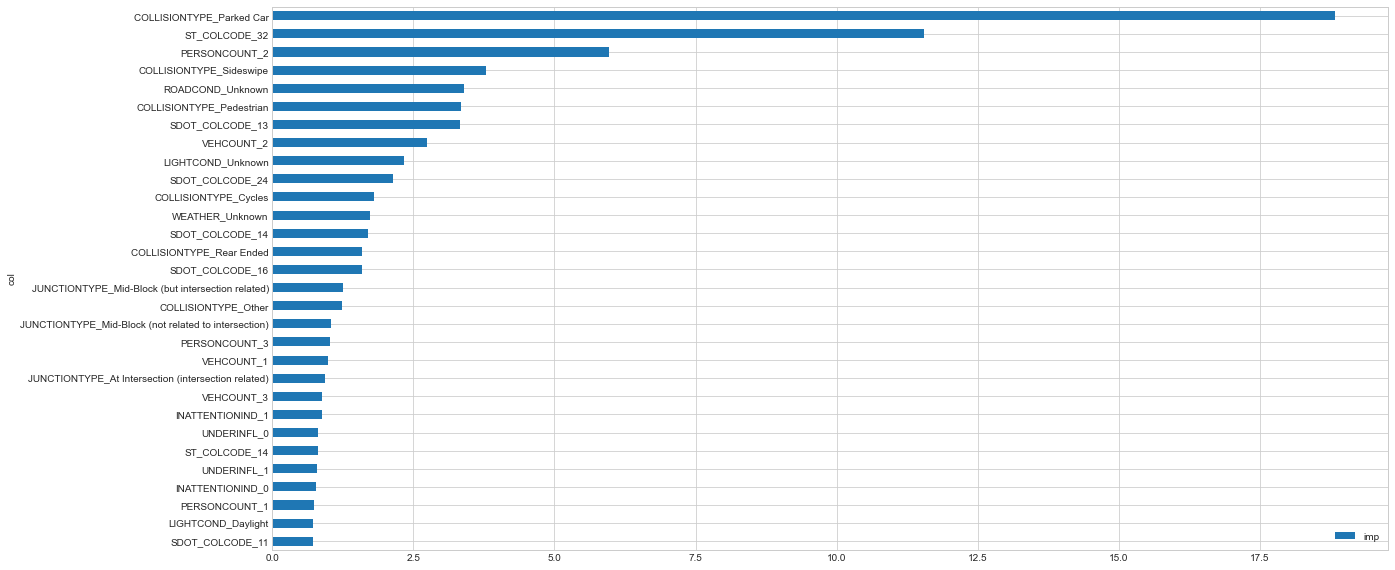

In [111]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train_enc)

#### Why would you want feature importance?

Feature importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model.Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

## Results and Discussion 

our ML model manage to predict severity of car accident with 76% accuracy, with the most important feature is Collision type with parked car this is make sense because when there is accident with another parked car most likely it will be a property damage collision.

some feature that I dont use such as INCDATE,INCDTTM could be used to predict whether the accident more likely happen at night, day, weekend, weekdays, etc. We could also group up Person Count when the number reach more than 5, and if the target feature has more than 2 variable it probably more useful in real life (such as 3 = fatality, 2 = serious injury, 1 = injury, 0 = property damage).



## Conclusion 

Purpose of this project was to predict severity of car accident from sample data that I get from Coursera Capstone, This project is targeted to police officer or any interested stakeholder, Algorithm that I used was CatBoost Algorithm which give our model accuracy of 76%, top 3 feature that is important is Collision Type,State Collision Code and Person Count.